In [1]:
# Plotting ----

# Get all required packages

#%%
%load_ext autoreload
%autoreload 2

# Packages
import os
import rioxarray as rio

# Local modules
from mod_ra1_plots import *

In [2]:
# Directories
input_dir = '../data_input/'
output_dir = '../data_output/'

# Choose the list of inversion data version to analyse. Later (shorter) time series are driven by data from more stations.
inversions = {'s81':1981, 's85':1985, 's99':1999, 's06':2006, 's10':2010}  # Inversion starting year. Options: s85, s99, s06, s10
inversions = {'s99':1999}  # Inversion starting year. Options: s85, s99, s06, s10

# List of strating years to define analysis periods
periods = [(1976,2021), (1981,2021), (1985,2021), (1999,2021), (2006,2021), (2010,2021)]
periods = [(1999,2021)]

/Users/moyanofe/Work/Augsburg/Analysis/Recovery_Analysis1/scripts_local/mod_ra1_plots.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(p1, label=xr_val.attrs['units'])


inv_start:  1999
period:  (1999, 2021)
Reading data:  s99 , period:  (1999, 2021)


/Users/moyanofe/Work/Augsburg/Analysis/Recovery_Analysis1/scripts_local/mod_ra1_plots.py:93: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(p1, label=xr_val.attrs['units'])


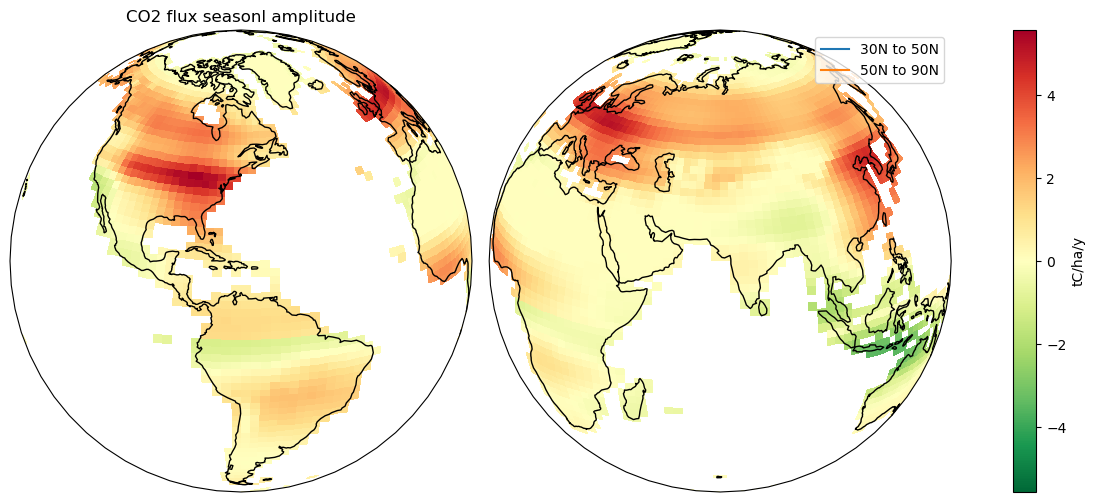

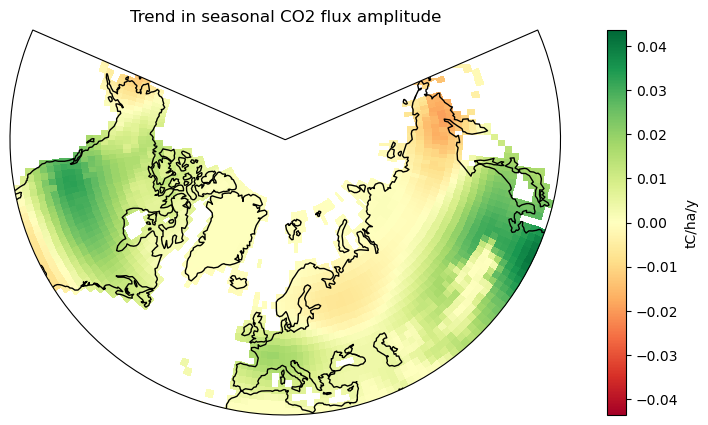

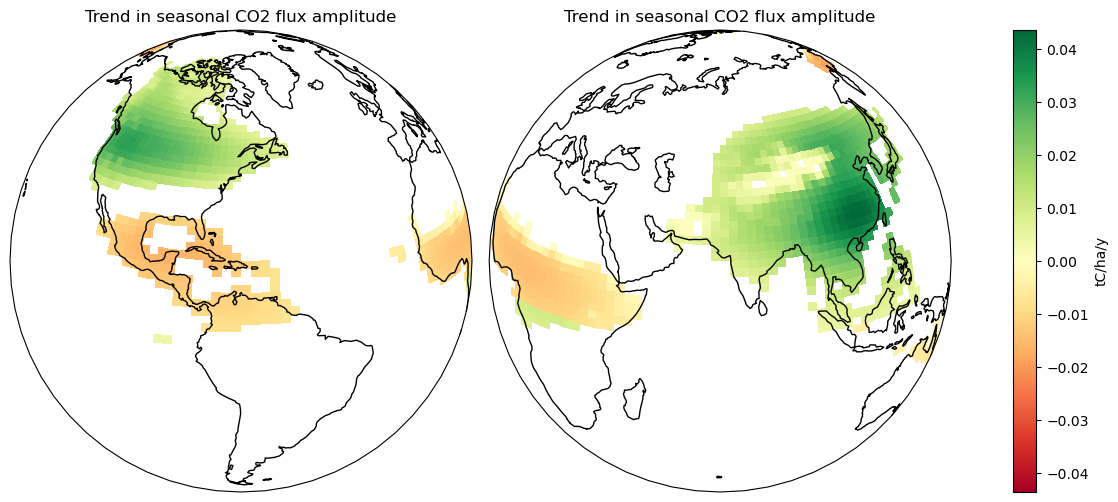

In [3]:
for inv in inversions:

    inv_start = inversions[inv]

    file_in_amp = os.path.join(output_dir, 'co2fluxAmp_'+inv+'.nc')
    co2fluxAmp = rio.open_rasterio(file_in_amp)

    # Plot the first band of co2 flux rates
    plotOrthographic(xr_val=co2fluxAmp.isel(year=0), ident=inv)

    # Plotting of seasonal amplitude time series
    plotRegMeans(xr_val=co2fluxAmp, lats=([30, 50], [50, 90]), ident=inv)


    for period in periods:

        print('inv_start: ', inv_start)
        print('period: ', period)
    
        if(inv_start > period[0]):
            print('Continuing ...')
            continue

        print('Reading data: ', inv, ', period: ', period)

        ident = inv + '_' + str(period[0])+'-'+str(period[1])
        file_in_stats = os.path.join(output_dir, 'co2fluxAmpStats_'+ident+'.nc')
        co2fluxAmpStats = rio.open_rasterio(file_in_stats)

        # Map plot of flux trends in the northern hemisphere
        plotLambert(xarray=co2fluxAmpStats.slope, ident=ident)

        # Plot values with significance filter
        plotOrthoSig(xr_val=co2fluxAmpStats.slope, xr_pval=co2fluxAmpStats.p_value, p_lim=0.1, ident=ident)